In [ ]:
import torch
print(torch.__version__)

import torchvision
from torchvision import datasets, transforms

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, )
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, )

print(len(mnist_trainset))
print(len(mnist_testset))

1.9.0+cu102
60000
10000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


4
torch.Size([784])


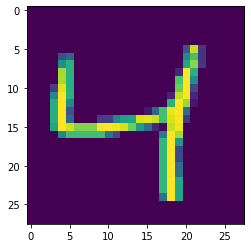

In [ ]:
import matplotlib.pyplot as plt

i = 2
example = mnist_trainset[i]
img = example[0]
label = example[1]
plt.imshow(img)
print(label)

trans = transforms.ToTensor()
tensor = trans(img).view(28*28)
print(tensor.shape)

In [ ]:
import torch.nn as nn

W1 = torch.nn.Parameter(torch.zeros(64, 32).uniform_(-0.1, 0.1))
b = torch.nn.Parameter(torch.zeros(64).uniform_(-0.1, 0.1))
W2 = torch.nn.Parameter(torch.zeros(784, 64).uniform_(-0.1, 0.1))

W3 = torch.nn.Parameter(torch.zeros(32, 784).uniform_(-0.1, 0.1))
c = torch.nn.Parameter(torch.zeros(32).uniform_(-0.1, 0.1))
W4 = torch.nn.Parameter(torch.zeros(32, 32).uniform_(-0.1, 0.1))

print(W1)

Parameter containing:
tensor([[-0.0609,  0.0857, -0.0172,  ...,  0.0725, -0.0984, -0.0167],
        [-0.0793, -0.0230,  0.0846,  ...,  0.0411,  0.0824, -0.0198],
        [-0.0936, -0.0046, -0.0199,  ..., -0.0255,  0.0592,  0.0505],
        ...,
        [ 0.0662, -0.0206,  0.0958,  ...,  0.0221, -0.0791, -0.0789],
        [ 0.0888, -0.0290,  0.0233,  ..., -0.0146,  0.0325, -0.0312],
        [-0.0750, -0.0134, -0.0821,  ...,  0.0397,  0.0233,  0.0071]],
       requires_grad=True)


In [ ]:
import math
lr = 1e-4
sig1 = 1.5
sig2 = 2
k = 2
import random

optimizer = torch.optim.Adam([W1, b, W2, W3, c, W4], lr=lr)

losses = []
updates = []
update = 0
import tqdm
for epoch in range(5):
  for num in tqdm.tqdm(range(len(mnist_trainset))):
    i = random.randint(0, 4999)
    example = mnist_trainset[i]
    label = example[1]

    epsilon = torch.randn(32)
    optimizer.zero_grad()
    img = example[0]
    tensor = trans(img).view(28*28)
    
    Mu = W4 @ torch.relu(W3 @ tensor + c)
    z = Mu + math.sqrt(sig2) * epsilon
    Y = W2 @ torch.relu(W1 @ z + b)
  
    loss = math.log(sig1) + 0.5 * torch.dot((tensor - Y), (tensor - Y)) / (sig1 * sig1) + 0.5 * (sig2 + torch.transpose(Mu, 0, -1) @ Mu - k - math.log(sig2)) 
    update += 1
    updates.append(update)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()



100%|██████████| 60000/60000 [02:54<00:00, 344.21it/s]


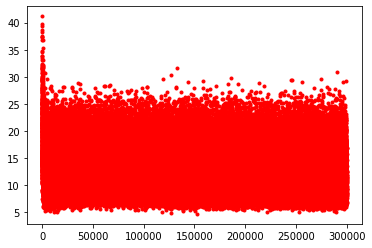

In [ ]:
import matplotlib.pyplot as plt
plt.plot(updates, losses, 'r.')

torch.Size([784])


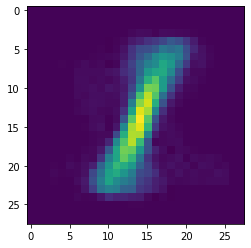

In [ ]:
epsilon = torch.randn(32)
sig1 = 1.5
sig2 = 2
k = 2

Mu = W4 @ torch.relu(W3 @ tensor + c)
z = Mu + math.sqrt(sig2) * epsilon
Y = W2 @ torch.relu(W1 @ z + b)

print(Y.shape)
plt.imshow(Y.view(28,28).detach())

tensor([-1.5231,  0.3576, -0.7367, -0.6349, -0.3115,  1.0443,  0.1748, -0.1539,
        -0.3448,  0.3411, -0.6377, -0.5540,  2.0484, -0.3068, -0.3568,  0.7738,
        -0.3745,  1.2695,  0.9244, -2.9620,  0.0589,  1.8180,  0.6686, -0.5477,
        -0.1609, -0.6082,  0.3165, -2.3418, -1.0985, -3.3847, -0.0995, -0.7740])
torch.Size([784])


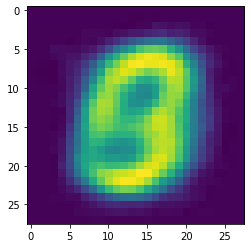

In [ ]:
z2 = torch.randn(32)
print(z2)
test = W2 @ torch.relu(W1 @ z2 + b)
print(test.shape)
plt.imshow(test.view(28,28).detach())

In [ ]:
random = torch.randn(5)
print(random)
print(2*random)

tensor([-1.3896,  0.5334,  1.2020, -1.3717, -1.4105])
tensor([-2.7791,  1.0667,  2.4040, -2.7435, -2.8210])


In [ ]:
import math
test = 0.1
print(math.log(test))

-2.3025850929940455
